# 06 - Création du dataset des données de jobs et de job_events fusionnées

Ce notebook génère 1 csv :

- merge_raw_jobs_and_clean_jobevents_dataset.csv

Etapes :

- Suppression des colonnes doublon dans les 2 datasets

- Fusion des datasets

# A. Imports

## a) Librairies

In [1]:
import os, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## b) Données

In [2]:
# source path
jobs = '../data/jobs/raw_jobs_dataset.csv'

# source path
events = '../data/jobs/clean_merge_job_events_dataset.csv'

# save target path
save_csv = '../data/jobs/merge_raw_jobs_and_clean_jobevents_dataset.csv'

# B. Dataframe

## a) Création des dataframes jobs et events

### 1. jobs

In [3]:
# création d'un dataframe à partir du csv de données
jobs_df = pd.read_csv(jobs, index_col=0)
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 0 to 4181
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_copies                  4182 non-null   int64  
 1   started_at                    4182 non-null   object 
 2   ended_at                      4182 non-null   object 
 3   speed                         4182 non-null   int64  
 4   operator                      4182 non-null   object 
 5   operator_level                4182 non-null   object 
 6   paperHeight                   4182 non-null   int64  
 7   paperWidth                    4182 non-null   int64  
 8   paperThickness                4182 non-null   int64  
 9   id_on_machine                 4182 non-null   int64  
 10  total_copies_requested        4182 non-null   int64  
 11  uses_ifoil                    4182 non-null   bool   
 12  uses_iper                     4182 non-null   bool   
 13  sca

### 2. job events

In [4]:
# création d'un dataframe à partir du csv de données
events_df = pd.read_csv(events, index_col=0)
events_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 0 to 4224
Data columns (total 40 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   jobId                                                 4225 non-null   int64  
 1   timestamp_start                                       4225 non-null   object 
 2   jsonVersion_x                                         4225 non-null   int64  
 3   totalCopies_start                                     4225 non-null   int64  
 4   LED_iper                                              4225 non-null   int64  
 5   bars_iper                                             4225 non-null   object 
 6   drops_iper                                            4225 non-null   int64  
 7   dithering_iper                                        4225 non-null   bool   
 8   deadPixelsOffset_iper                                 4225

## b) Création d'un dataframe fusionné

### 1. Suppression de colonnes

In [5]:
# suppression des colonnes avec des valeurs uniques
for col in list(jobs_df.columns):
    if jobs_df[col].nunique() == 1:
        jobs_df.drop(col, axis=1, inplace=True)

In [6]:
# suppression des colonnes avec des valeurs uniques
for col in list(events_df.columns) :
    if events_df[col].nunique() == 1:
        events_df.drop(col, axis=1, inplace=True)

### 2. Concordance des colonnes entre dataframes

In [7]:
# on renomme des colonnes de jobs
jobs_df = jobs_df.rename(columns={
 'uses_ifoil' : 'ifoil',
 'iper_bvar_count': 'bars'
 })

In [8]:
# on renomme des colonnes de events
events_df = events_df.rename(columns={
    'totalCopies_start':'total_copies_requested',
    'LED_iper' : 'LED',
    'bars_iper' : 'bars',
    'drops_iper': 'drops',
    'dithering_iper' : 'dithering',
    'deadPixelsOffset_iper' : 'deadPixelsOffset',
    'level_user' : 'operator_level',
    'operator_user':'operator',
    'enabled_ifoil' : 'ifoil',
    'x_imageLayout_layout' : 'x_imageLayout',
    'y_imageLayout_layout' : 'y_imageLayout',
    'name_paperFormat_layout' : 'paperName',
    'width_paperFormat_layout' : 'paperWidth',
    'height_paperFormat_layout' : 'paperHeight',
    'speed_layout' : 'speed',
    'topMargin_registration_remoteScannerRegistration' : 'topMargin_remoteScannerRegistration',
    'leftMargin_registration_remoteScannerRegistration' : 'leftMargin_remoteScannerRegistration',
    'totalCopies_end' : 'total_copies',
    'consumption_operatorSideTanks_varnishConsumption' : 'varnishConsumptionVarnish_3d'
    })

In [9]:
# Comparer les valeurs de la colonne "bars" entre les dataframes "events_df" et "jobs_df"
events_df['bars'].isin(jobs_df['bars']).any()

False

In [10]:
# liste des colonnes communes
common_cols = [col for col in jobs_df.columns.to_list() if col in events_df.columns.to_list()]

### 3. Concordance des valeurs entre colonnes communes

In [11]:
jobs_df.shape

(4182, 17)

In [12]:
events_df.shape

(4225, 38)

In [13]:
events_df.columns

Index(['jobId', 'timestamp_start', 'total_copies_requested', 'LED', 'bars',
       'drops', 'dithering', 'deadPixelsOffset', 'operator_level', 'operator',
       'speed_ifoil', 'ifoil', 'optifoil_ifoil', 'stampAreas_ifoil',
       'heater1Enabled_ifoil', 'speedTensionIn_ifoil', 'speedTensionOut_ifoil',
       'heater1Temperature_ifoil', 'x_imageLayout', 'y_imageLayout',
       'paperWidth', 'paperHeight', 'speed', 'power_irDryers',
       'power_uvDryers', 'topMargin_remoteScannerRegistration',
       'leftMargin_remoteScannerRegistration',
       'redScore_gridMode_remoteScannerRegistration',
       'redScore_cropmarksMode_remoteScannerRegistration',
       'redScore_fullScannerMode_remoteScannerRegistration',
       'blueScore_fullScannerMode_remoteScannerRegistration',
       'greenScore_fullScannerMode_remoteScannerRegistration',
       'enable_specialSubstrate_remoteScannerRegistration',
       'mode_remoteScannerRegistration', 'jobState', 'timestamp_end',
       'total_copies', '

In [14]:
# Colonnes de events_df_17
cols_events_df_17 = ['jobId', 'timestamp_start', 'total_copies_requested', 'LED', 'bars',
                     'drops', 'dithering', 'deadPixelsOffset', 'operator_level', 'operator',
                     'speed_ifoil', 'ifoil', 'optifoil_ifoil', 'stampAreas_ifoil',
                     'heater1Enabled_ifoil', 'speedTensionIn_ifoil', 'speedTensionOut_ifoil',
                     'heater1Temperature_ifoil', 'x_imageLayout', 'y_imageLayout',
                     'paperName', 'paperWidth', 'paperHeight', 'speed', 'power_irDryers',
                     'power_uvDryers', 'redScore_gridMode_remoteScannerRegistration',
                     'redScore_cropmarksMode_remoteScannerRegistration',
                     'x_cropmark1_cropmarksMode_remoteScannerRegistration',
                     'y_cropmark1_cropmarksMode_remoteScannerRegistration',
                     'x_cropmark2_cropmarksMode_remoteScannerRegistration',
                     'y_cropmark2_cropmarksMode_remoteScannerRegistration',
                     'exposureTime_manualLighting_remoteScannerRegistration',
                     'redScore_fullScannerMode_remoteScannerRegistration',
                     'blueScore_fullScannerMode_remoteScannerRegistration',
                     'greenScore_fullScannerMode_remoteScannerRegistration',
                     'enable_specialSubstrate_remoteScannerRegistration',
                     'mode_remoteScannerRegistration', 'jobState', 'timestamp_end',
                     'total_copies', 'varnishConsumptionVarnish_3d']

# Colonnes de events_df_14
cols_events_df_14 = ['jobId', 'timestamp_start', 'total_copies_requested', 'LED', 'bars',
                     'drops', 'dithering', 'deadPixelsOffset', 'operator_level', 'operator',
                     'speed_ifoil', 'ifoil', 'optifoil_ifoil', 'stampAreas_ifoil',
                     'heater1Enabled_ifoil', 'speedTensionIn_ifoil',
                     'heater1Temperature_ifoil', 'x_imageLayout', 'y_imageLayout',
                     'paperName', 'paperWidth', 'paperHeight', 'speed', 'power_irDryers',
                     'power_uvDryers', 'topMargin_remoteScannerRegistration',
                     'leftMargin_remoteScannerRegistration',
                     'redScore_gridMode_remoteScannerRegistration',
                     'redScore_cropmarksMode_remoteScannerRegistration',
                     'redScore_fullScannerMode_remoteScannerRegistration',
                     'blueScore_fullScannerMode_remoteScannerRegistration',
                     'greenScore_fullScannerMode_remoteScannerRegistration',
                     'mode_remoteScannerRegistration', 'jobState', 'timestamp_end',
                     'total_copies', 'varnishConsumptionVarnish_3d']

# Trouver les colonnes uniques à events_df_17
unique_cols_to_df_17 = set(cols_events_df_17) - set(cols_events_df_14)

print(unique_cols_to_df_17)

{'enable_specialSubstrate_remoteScannerRegistration', 'x_cropmark1_cropmarksMode_remoteScannerRegistration', 'speedTensionOut_ifoil', 'y_cropmark2_cropmarksMode_remoteScannerRegistration', 'exposureTime_manualLighting_remoteScannerRegistration', 'y_cropmark1_cropmarksMode_remoteScannerRegistration', 'x_cropmark2_cropmarksMode_remoteScannerRegistration'}


In [15]:
jobs_df.head()

,total_copies,started_at,ended_at,speed,operator,operator_level,paperHeight,paperWidth,id_on_machine,total_copies_requested,ifoil,scanner_mode,bars,varnishConsumptionVarnish_3d,run,total_run,copies_per_run
0,1,2022-10-25 08:25:14.728000+00:00,2022-10-25 08:26:18.522000+00:00,179,User,Operator,500,320,1666686314,1,False,1,2,0.046652,0,0,0
1,4,2022-10-25 08:27:37.387000+00:00,2022-10-25 08:28:49.018000+00:00,209,User,Operator,500,320,1666686457,4,False,1,2,0.158389,0,0,0
2,1,2022-10-25 08:30:20.210000+00:00,2022-10-25 08:31:20.859000+00:00,209,User,Operator,500,320,1666686620,1,False,1,2,0.368169,0,0,0
3,4,2022-10-25 08:32:05.603000+00:00,2022-10-25 08:33:24.691000+00:00,209,User,Operator,500,320,1666686725,4,False,1,2,1.471035,0,0,0
4,4,2022-10-25 10:46:30.394000+00:00,2022-10-25 10:48:54.039000+00:00,209,User,Operator,500,320,1666694790,4,False,1,2,1.468951,0,0,0


In [16]:
events_df.head()

,jobId,timestamp_start,total_copies_requested,LED,bars,drops,dithering,deadPixelsOffset,operator_level,operator,...,redScore_cropmarksMode_remoteScannerRegistration,redScore_fullScannerMode_remoteScannerRegistration,blueScore_fullScannerMode_remoteScannerRegistration,greenScore_fullScannerMode_remoteScannerRegistration,enable_specialSubstrate_remoteScannerRegistration,mode_remoteScannerRegistration,jobState,timestamp_end,total_copies,varnishConsumptionVarnish_3d
0,1666686314,2022-10-25 08:25:14.728352300+00:00,1,100,"[1, 2]",7,False,0,Operator,User,...,1500,1500,16,16,False,1,SUCCESS,2022-10-25 08:26:18.522747100+00:00,1,0.046652
1,1666686457,2022-10-25 08:27:37.387883400+00:00,4,100,"[1, 2]",6,False,0,Operator,User,...,1500,1500,16,16,False,1,SUCCESS,2022-10-25 08:28:49.018322900+00:00,4,0.158389
2,1666686620,2022-10-25 08:30:20.210358400+00:00,1,100,"[1, 2]",6,False,0,Operator,User,...,1500,1500,16,16,False,1,SUCCESS,2022-10-25 08:31:20.859169700+00:00,1,0.368169
3,1666686725,2022-10-25 08:32:05.603378900+00:00,4,100,"[1, 2]",6,False,0,Operator,User,...,1500,1500,16,16,False,1,SUCCESS,2022-10-25 08:33:24.691878+00:00,4,1.471035
4,1666694790,2022-10-25 10:46:30.394126800+00:00,4,100,"[1, 2]",6,False,0,Operator,User,...,1500,1500,16,16,False,1,SUCCESS,2022-10-25 10:48:54.039976100+00:00,4,1.468951


In [17]:
events_df.shape

(4225, 38)

In [18]:
jobs_df.shape

(4182, 17)

In [19]:
# on supprime les lignes dans events_df qui n'ont pas de JobId qui coïncident avec 'id_on_machine' de jobs_df
events_df = events_df[events_df['jobId'].isin(jobs_df['id_on_machine'])]

In [20]:
events_df.shape

(4182, 38)

In [21]:
# # on liste les colonnes des deux dataframes contenant toutes leurs valeurs identiques
# col_with_duplicates = []
# for col in common_cols :
#     if (events_df[col].values == jobs_df[col].values).all():
#         col_with_duplicates.append(col)
# col_with_duplicates
col_with_duplicates = []
for col in common_cols:
    # Vérifier si les deux colonnes ont la même longueur
    if len(events_df[col]) == len(jobs_df[col]):
        # Si elles ont la même longueur, effectuer la comparaison
        if (events_df[col].values == jobs_df[col].values).all():
            col_with_duplicates.append(col)
    else:
        print(f"Les colonnes {col} n'ont pas la même longueur.")
col_with_duplicates

['total_copies',
 'speed',
 'operator',
 'operator_level',
 'total_copies_requested',
 'ifoil',
 'varnishConsumptionVarnish_3d']

In [22]:
# suppression des colonnes de jobs en doublons dans events
jobs_df = jobs_df.drop(col_with_duplicates, axis=1)

### 4. Fusion des dataframes

In [23]:
merge_df = pd.merge(jobs_df, events_df, left_on='id_on_machine', right_on='jobId', suffixes=['_job', '_event'])
merge_df = merge_df.drop('id_on_machine', axis=1)

### 5. Vérification

In [24]:
# on verifie que les jobId sont uniques
merge_df.jobId.duplicated().any()

False

In [25]:
merge_df.head()

,started_at,ended_at,paperHeight_job,paperWidth_job,scanner_mode,bars_job,run,total_run,copies_per_run,jobId,...,redScore_cropmarksMode_remoteScannerRegistration,redScore_fullScannerMode_remoteScannerRegistration,blueScore_fullScannerMode_remoteScannerRegistration,greenScore_fullScannerMode_remoteScannerRegistration,enable_specialSubstrate_remoteScannerRegistration,mode_remoteScannerRegistration,jobState,timestamp_end,total_copies,varnishConsumptionVarnish_3d
0,2022-10-25 08:25:14.728000+00:00,2022-10-25 08:26:18.522000+00:00,500,320,1,2,0,0,0,1666686314,...,1500,1500,16,16,False,1,SUCCESS,2022-10-25 08:26:18.522747100+00:00,1,0.046652
1,2022-10-25 08:27:37.387000+00:00,2022-10-25 08:28:49.018000+00:00,500,320,1,2,0,0,0,1666686457,...,1500,1500,16,16,False,1,SUCCESS,2022-10-25 08:28:49.018322900+00:00,4,0.158389
2,2022-10-25 08:30:20.210000+00:00,2022-10-25 08:31:20.859000+00:00,500,320,1,2,0,0,0,1666686620,...,1500,1500,16,16,False,1,SUCCESS,2022-10-25 08:31:20.859169700+00:00,1,0.368169
3,2022-10-25 08:32:05.603000+00:00,2022-10-25 08:33:24.691000+00:00,500,320,1,2,0,0,0,1666686725,...,1500,1500,16,16,False,1,SUCCESS,2022-10-25 08:33:24.691878+00:00,4,1.471035
4,2022-10-25 10:46:30.394000+00:00,2022-10-25 10:48:54.039000+00:00,500,320,1,2,0,0,0,1666694790,...,1500,1500,16,16,False,1,SUCCESS,2022-10-25 10:48:54.039976100+00:00,4,1.468951


In [26]:
merge_df.columns

Index(['started_at', 'ended_at', 'paperHeight_job', 'paperWidth_job',
       'scanner_mode', 'bars_job', 'run', 'total_run', 'copies_per_run',
       'jobId', 'timestamp_start', 'total_copies_requested', 'LED',
       'bars_event', 'drops', 'dithering', 'deadPixelsOffset',
       'operator_level', 'operator', 'speed_ifoil', 'ifoil', 'optifoil_ifoil',
       'stampAreas_ifoil', 'heater1Enabled_ifoil', 'speedTensionIn_ifoil',
       'speedTensionOut_ifoil', 'heater1Temperature_ifoil', 'x_imageLayout',
       'y_imageLayout', 'paperWidth_event', 'paperHeight_event', 'speed',
       'power_irDryers', 'power_uvDryers',
       'topMargin_remoteScannerRegistration',
       'leftMargin_remoteScannerRegistration',
       'redScore_gridMode_remoteScannerRegistration',
       'redScore_cropmarksMode_remoteScannerRegistration',
       'redScore_fullScannerMode_remoteScannerRegistration',
       'blueScore_fullScannerMode_remoteScannerRegistration',
       'greenScore_fullScannerMode_remoteScannerR

In [27]:
# id temoin
check_jobid = 1645522984
# détail de la ligne témoin dans chaque dataset
jobs_check_line = jobs_df[jobs_df.id_on_machine == check_jobid]
events_check_line = events_df[events_df.jobId == check_jobid]
merge_check_line = merge_df[merge_df.jobId == check_jobid]

In [28]:
jobs_check_line

,started_at,ended_at,paperHeight,paperWidth,id_on_machine,scanner_mode,bars,run,total_run,copies_per_run


In [29]:
events_check_line

,jobId,timestamp_start,total_copies_requested,LED,bars,drops,dithering,deadPixelsOffset,operator_level,operator,...,redScore_cropmarksMode_remoteScannerRegistration,redScore_fullScannerMode_remoteScannerRegistration,blueScore_fullScannerMode_remoteScannerRegistration,greenScore_fullScannerMode_remoteScannerRegistration,enable_specialSubstrate_remoteScannerRegistration,mode_remoteScannerRegistration,jobState,timestamp_end,total_copies,varnishConsumptionVarnish_3d


In [30]:
merge_check_line

,started_at,ended_at,paperHeight_job,paperWidth_job,scanner_mode,bars_job,run,total_run,copies_per_run,jobId,...,redScore_cropmarksMode_remoteScannerRegistration,redScore_fullScannerMode_remoteScannerRegistration,blueScore_fullScannerMode_remoteScannerRegistration,greenScore_fullScannerMode_remoteScannerRegistration,enable_specialSubstrate_remoteScannerRegistration,mode_remoteScannerRegistration,jobState,timestamp_end,total_copies,varnishConsumptionVarnish_3d


In [31]:
# on conserve les colonnes started_at et ended_at
for index, row in merge_df.iterrows():
    # on verifie que started_at à le datetime le plus petit
    if row.timestamp_start < row.started_at :
        row.started_at = row.timestamp_start
    # on verifie que ended_at à le datetime le plus grand
    if row.timestamp_end > row.ended_at :
        row.ended_at = row.timestamp_end

In [32]:
merge_df = merge_df.drop(['timestamp_start','timestamp_end'], axis=1)

In [33]:
# # conversion des colonnes contenant des valeurs de temsps au format datetime
# jobs_df['started_at'] = pd.to_datetime(jobs_df['started_at'], utc=True)
# jobs_df['ended_at'] = pd.to_datetime(jobs_df['ended_at'], utc=True)
# events_df['timestamp_start'] = pd.to_datetime(events_df['timestamp_start'], utc=True)
# events_df['timestamp_end'] = pd.to_datetime(events_df['timestamp_end'], utc=True)

### 6. Output csv

In [34]:
# sauvegarde du dataset en csv
merge_df.to_csv(save_csv)

In [35]:
merge_df.head(3)

,started_at,ended_at,paperHeight_job,paperWidth_job,scanner_mode,bars_job,run,total_run,copies_per_run,jobId,...,redScore_gridMode_remoteScannerRegistration,redScore_cropmarksMode_remoteScannerRegistration,redScore_fullScannerMode_remoteScannerRegistration,blueScore_fullScannerMode_remoteScannerRegistration,greenScore_fullScannerMode_remoteScannerRegistration,enable_specialSubstrate_remoteScannerRegistration,mode_remoteScannerRegistration,jobState,total_copies,varnishConsumptionVarnish_3d
0,2022-10-25 08:25:14.728000+00:00,2022-10-25 08:26:18.522000+00:00,500,320,1,2,0,0,0,1666686314,...,1500,1500,1500,16,16,False,1,SUCCESS,1,0.046652
1,2022-10-25 08:27:37.387000+00:00,2022-10-25 08:28:49.018000+00:00,500,320,1,2,0,0,0,1666686457,...,1500,1500,1500,16,16,False,1,SUCCESS,4,0.158389
2,2022-10-25 08:30:20.210000+00:00,2022-10-25 08:31:20.859000+00:00,500,320,1,2,0,0,0,1666686620,...,1500,1500,1500,16,16,False,1,SUCCESS,1,0.368169


In [36]:
for col in merge_df.columns:
    unique_values = merge_df[col].nunique()
    print(f"Column {col} has {unique_values} unique values.")


Column started_at has 4182 unique values.
Column ended_at has 4182 unique values.
Column paperHeight_job has 37 unique values.
Column paperWidth_job has 35 unique values.
Column scanner_mode has 3 unique values.
Column bars_job has 2 unique values.
Column run has 2 unique values.
Column total_run has 2 unique values.
Column copies_per_run has 103 unique values.
Column jobId has 4182 unique values.
Column total_copies_requested has 184 unique values.
Column LED has 51 unique values.
Column bars_event has 3 unique values.
Column drops has 14 unique values.
Column dithering has 2 unique values.
Column deadPixelsOffset has 11 unique values.
Column operator_level has 2 unique values.
Column operator has 2 unique values.
Column speed_ifoil has 79 unique values.
Column ifoil has 2 unique values.
Column optifoil_ifoil has 2 unique values.
Column stampAreas_ifoil has 58 unique values.
Column heater1Enabled_ifoil has 2 unique values.
Column speedTensionIn_ifoil has 6 unique values.
Column speedT

In [37]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 0 to 4181
Data columns (total 45 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   started_at                                            4182 non-null   object 
 1   ended_at                                              4182 non-null   object 
 2   paperHeight_job                                       4182 non-null   int64  
 3   paperWidth_job                                        4182 non-null   int64  
 4   scanner_mode                                          4182 non-null   int64  
 5   bars_job                                              4182 non-null   int64  
 6   run                                                   4182 non-null   int64  
 7   total_run                                             4182 non-null   int64  
 8   copies_per_run                                        4182

# C. Visualisation

In [38]:
df = merge_df.copy()

In [39]:
df.jobState.unique()

array(['SUCCESS', 'CANCELED', 'ERROR', 'UNDEFINED'], dtype=object)

In [40]:
df.columns

Index(['started_at', 'ended_at', 'paperHeight_job', 'paperWidth_job',
       'scanner_mode', 'bars_job', 'run', 'total_run', 'copies_per_run',
       'jobId', 'total_copies_requested', 'LED', 'bars_event', 'drops',
       'dithering', 'deadPixelsOffset', 'operator_level', 'operator',
       'speed_ifoil', 'ifoil', 'optifoil_ifoil', 'stampAreas_ifoil',
       'heater1Enabled_ifoil', 'speedTensionIn_ifoil', 'speedTensionOut_ifoil',
       'heater1Temperature_ifoil', 'x_imageLayout', 'y_imageLayout',
       'paperWidth_event', 'paperHeight_event', 'speed', 'power_irDryers',
       'power_uvDryers', 'topMargin_remoteScannerRegistration',
       'leftMargin_remoteScannerRegistration',
       'redScore_gridMode_remoteScannerRegistration',
       'redScore_cropmarksMode_remoteScannerRegistration',
       'redScore_fullScannerMode_remoteScannerRegistration',
       'blueScore_fullScannerMode_remoteScannerRegistration',
       'greenScore_fullScannerMode_remoteScannerRegistration',
       'enab

In [41]:
# on remplace dans le dataframe les valeurs du type 'str' avec un code
criticality = {'UNDEFINED': 0, 'SUCCESS': 1, 'CANCELED': 2, 'ERROR':3}
df.jobState.replace(criticality, inplace=True)
df.jobState = pd.to_numeric(df.jobState).astype('int64')

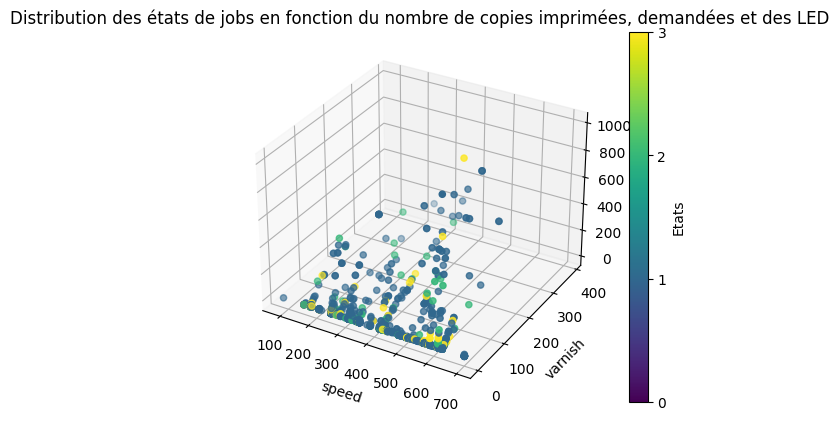

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some sample data
x = df['speed'][:1000]
y = df['varnishConsumptionVarnish_3d'][:1000]
z = df[['total_copies']][:1000]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
c = df[['jobState']][:1000]
scatter = ax.scatter(x, y, z, c=c, cmap='viridis')

# Customize the plot
ax.set_xlabel('speed')
ax.set_ylabel('varnish')
ax.set_zlabel('printed')
ax.set_title('Distribution des états de jobs en fonction du nombre de copies imprimées, demandées et des LED')

# Add colorbar with precise tick labels
cbar = fig.colorbar(scatter, ticks=np.linspace(min(c.jobState), max(c.jobState), num=4))
cbar.set_label('Etats')

# Show the plot
plt.show()

In [ ]:
min(c.jobState)

1